In [1]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from pathlib import Path
import numpy as np
import seaborn as sns
from matplotlib.pyplot import xlim, ylim
import pandas as pd

In [2]:
folder = "data/comp1_2020_1/"
Path(folder).mkdir(parents=True, exist_ok=True)

In [3]:
with open(f'{folder}/dropout_df_total_and_per_week_dict_3_6.pkl', 'rb') as pklfile:
    df_total_and_per_week = pickle.load(pklfile)

In [4]:
exclude = df_total_and_per_week[(df_total_and_per_week['attempts_12'] == 0) & \
                                (df_total_and_per_week['attempts_13'] == 0) & \
                                (df_total_and_per_week['attempts_14'] == 0) & \
                                (df_total_and_per_week['attempts_15'] == 0)]
dtw2 = df_total_and_per_week.drop(index=exclude.index)
dtw2

,attempts_12,success_rate_12,avg_timedelta_to_solution_12,avg_timedelta_from_beginning_12,on_time_exercises_12,frequency_12,success_count_12,attempts_13,success_rate_13,avg_timedelta_to_solution_13,...,on_time_exercises_19,frequency_19,success_count_19,attempts,success_rate,avg_timedelta_to_solution,avg_timedelta_from_beginning,on_time_exercises,frequency,success_count
910,8,0.375000,65.386857,328.720191,3,1,3,24,0.291667,291.476823,...,6,1,6,32,0.312500,223.649833,519.849833,10,2,10
911,4,0.750000,132.823499,684.156833,3,1,3,36,0.194444,23916.274449,...,6,2,6,40,0.250000,16781.239164,17381.439164,10,3,10
912,6,0.500000,24.270101,207.270101,3,1,3,7,1.000000,0.000000,...,6,1,6,13,0.769231,7.281030,141.581030,10,2,10
914,9,0.333333,430.621847,918.621847,3,1,3,91,0.076923,40044.526822,...,6,2,6,100,0.100000,28160.355329,28983.855329,10,4,10
915,8,0.375000,124.739469,243.072802,3,1,3,12,0.416667,18.759911,...,5,1,5,20,0.400000,58.502245,167.252245,8,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400,0,NaN,NaN,NaN,0,3,0,0,NaN,NaN,...,0,0,0,0,NaN,NaN,NaN,0,3,0
1403,0,NaN,NaN,NaN,0,0,0,0,NaN,NaN,...,5,1,5,0,NaN,NaN,NaN,0,0,0
1405,6,0.500000,32.428669,655.095336,0,2,3,22,0.181818,26859.988079,...,0,0,0,28,0.250000,15362.462618,15919.319761,0,7,7
1407,56,0.053571,2124.487458,3170.154125,0,1,3,0,NaN,NaN,...,0,0,0,56,0.053571,NaN,NaN,0,3,3


In [5]:
dtw2['success_count_label'] = dtw2['success_count_17'] + dtw2['success_count_19']

In [6]:
# Features and fill missing data
features_week7 = dtw2[['on_time_exercises_12',
                       'on_time_exercises_13',
                       'on_time_exercises_14',
                       'on_time_exercises_15',
                      ]].reset_index(drop=True)

# Target
outcome_week7 = dtw2['success_count_label'].reset_index(drop=True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features_week7, outcome_week7, test_size=0.2, random_state=0)
idx = np.array(X_train.index.tolist())

In [8]:
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const).fit()
X_test_const = sm.add_constant(X_test)
y_pred_ols = model.predict(X_test_const)
rmse = mean_squared_error(y_test, y_pred_ols, squared=False)
print("RMSE: %.2f" % rmse)
model.summary()

RMSE: 3.46


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     success_count_label   R-squared:                       0.329
Model:                             OLS   Adj. R-squared:                  0.321
Method:                  Least Squares   F-statistic:                     39.58
Date:                 Sun, 10 Jul 2022   Prob (F-statistic):           5.74e-27
Time:                         21:22:33   Log-Likelihood:                -919.70
No. Observations:                  328   AIC:                             1849.
Df Residuals:                      323   BIC:                             1868.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.3800      0.412     10.642      0.000       3.570       5.190
on_time_exercises_12     0.6982      0.183      3.820      0.000       0.339       1.058
on_time_exercises_13     0.1008      0.109      0.924      0.356      -0.114       0.316
on_time_exercises_14     0.2737      0.100      2.744      0.006       0.077       0.470
on_time_exercises_15     0.4637      0.127      3.639      0.000       0.213       0.714
==============================================================================
Omnibus:                        7.549   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.685
Skew:                          -0.352   Prob(JB):                       0.0214
Kurtosis:                       2.744   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
y_test

295    12
76      9
261     5
374     5
299    12
       ..
7      12
22     12
68      6
20      2
224    11
Name: success_count_label, Length: 82, dtype: int64

In [10]:
y_pred_ols

295     9.933854
76      4.380002
261     9.923000
374     7.139659
299    11.878578
         ...    
7      11.878578
22     11.878578
68      6.474746
20     10.285882
224    11.079521
Length: 82, dtype: float64

In [90]:
from cmath import nan

from sklearn.cluster import k_means

classifiers = list()
for c in np.arange(0,12.1,0.1):
    for k in [4,5,6,7]:
        predictions = list()
        for i in range(len(y_test)):
            if y_pred_ols.values[i] < c and y_test.values[i] < k:
                pred = "VP"
            elif y_pred_ols.values[i] < c and y_test.values[i] > k:
                pred = "FP"
            elif y_pred_ols.values[i] > c and y_test.values[i] > k:
                pred = "VN"
            else:
                pred = "FN"
            predictions.append(pred)
        
        VP = predictions.count("VP")
        VN = predictions.count("VN")
        FP = predictions.count("FP")
        FN = predictions.count("FN")
        TFP = FP/(FP+VN)
        TVP = VP/(VP+FN)
        TVN = VN/(FP+VN)
        try:
            VPP = VP/(VP+FP)
            F1_P = 2*VPP*TVP/(VPP+TVP)
        except:
            VPP = nan
            F1_P = nan
        try:
            VPN = VN/(FN+VN)
            F1_N = 2*VPN*TVN/(VPN+TVN)
        except:
            VPN = nan
            F1_N = nan

        classifiers.append({"C": c,
                            "K": str(k),
                            "VP": VP,
                            "VN": VN,
                            "FP": FP,
                            "FN": FN,
                            "TFP": TFP,
                            "TVP": TVP,
                            "TVN": TVN,
                            "F1_P": F1_P,
                            "F1_N": F1_N})
classifiers = pd.DataFrame(classifiers)

In [91]:
classifiers

,C,K,VP,VN,FP,FN,TFP,TVP,TVN,F1_P,F1_N
0,0.0,4,0,67,0,15,0.0,0.000000,1.0,NaN,0.899329
1,0.0,5,0,64,0,18,0.0,0.000000,1.0,NaN,0.876712
2,0.0,6,0,61,0,21,0.0,0.000000,1.0,NaN,0.853147
3,0.0,7,0,61,0,21,0.0,0.000000,1.0,NaN,0.853147
4,0.1,4,0,67,0,15,0.0,0.000000,1.0,NaN,0.899329
...,...,...,...,...,...,...,...,...,...,...,...
479,11.9,7,21,0,61,0,1.0,1.000000,0.0,0.407767,NaN
480,12.0,4,15,0,67,0,1.0,1.000000,0.0,0.309278,NaN
481,12.0,5,15,0,64,3,1.0,0.833333,0.0,0.309278,NaN
482,12.0,6,18,0,61,3,1.0,0.857143,0.0,0.360000,NaN


In [107]:
sns.set(rc={'figure.figsize':(10,7)})

C:\Users\joaop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[(0.0, 1.0), (0.0, 1.0)]

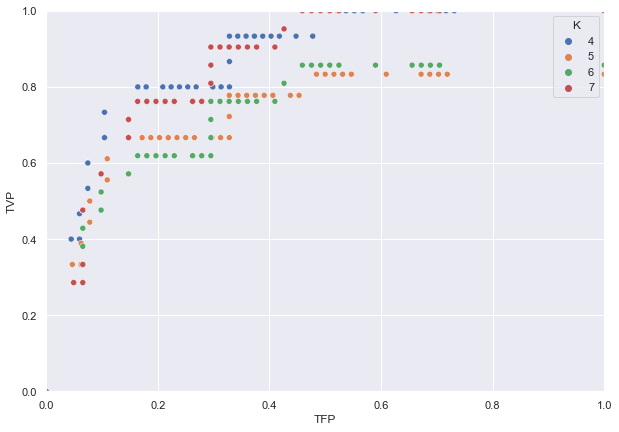

In [108]:
# Plot curva ROC
ax = sns.scatterplot("TFP","TVP", hue="K", data=classifiers)
ax.set(ylim=(0,1), xlim=(0,1))

C:\Users\joaop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


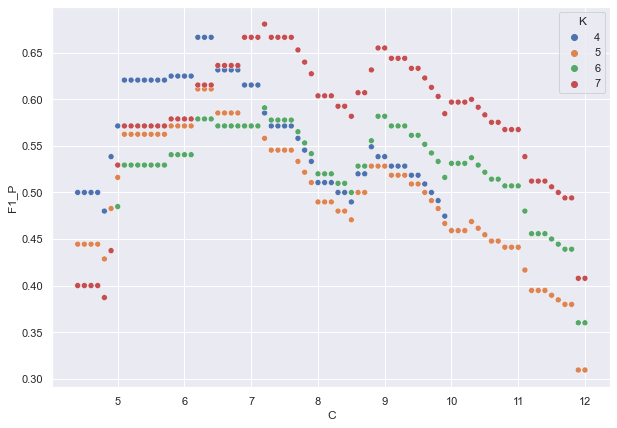

In [109]:
# Plot F1(P)
ax = sns.scatterplot("C","F1_P", hue="K", data=classifiers)

In [110]:
idx = classifiers["F1_P"].idxmax()
print("F1(P) máximo:", classifiers["F1_P"].max())
print("C com F1(P) máximo:", classifiers.iloc[idx,0])
print("K com F1(P) máximo:", classifiers.iloc[idx,1])

F1(P) máximo: 0.6808510638297872
C com F1(P) máximo: 7.2
K com F1(P) máximo: 7


C:\Users\joaop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


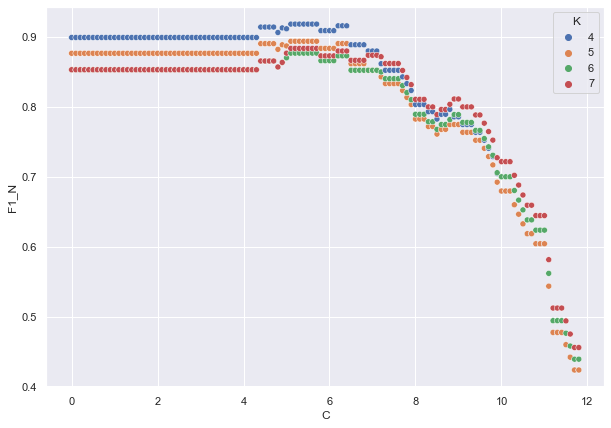

In [111]:
# Plot F1(N)
ax = sns.scatterplot("C","F1_N", hue="K", data=classifiers)

In [112]:
idx = classifiers["F1_N"].idxmax()
print("F1(N) máximo:", classifiers["F1_N"].max())
print("Corte com F1(N) máximo:", classifiers.iloc[idx,0])

F1(N) máximo: 0.9185185185185185
Corte com F1(N) máximo: 5.1000000000000005


C:\Users\joaop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


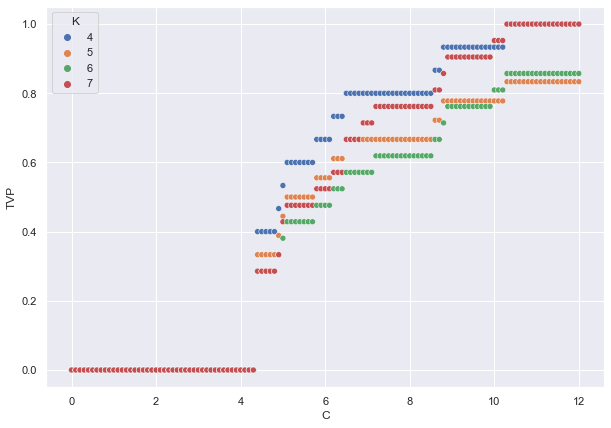

In [113]:
# Plot Recall
ax = sns.scatterplot("C","TVP", hue="K", data=classifiers)

C:\Users\joaop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


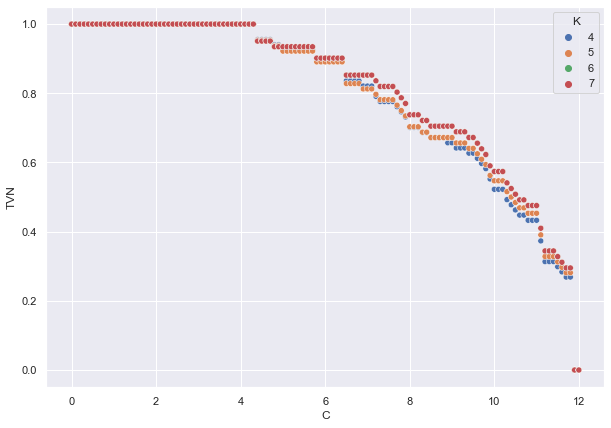

In [114]:
# Plot Recall
ax = sns.scatterplot("C","TVN", hue="K", data=classifiers)

In [115]:
classifiers.to_csv('classifiers_metrics.csv', index=False)

In [116]:
with open("%s/model_week7.pkl" % folder, "wb") as pklfile:
    pickle.dump(model, pklfile)